# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

## 1. Read in the file using pandas, and look at the first five rows

In [3]:
df = pd.read_excel("KyotoFullFlower7.xls")
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [4]:
df = pd.read_excel("KyotoFullFlower7.xls", header=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [5]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [6]:
df = pd.read_excel("KyotoFullFlower7.xls", header=25, na_values=["NaN", "-"])
df.columns = df.columns.str.replace(' ','_')
df.head(5)

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [7]:
df.Reference_Name.value_counts().head()
# The most common is NEWS-PAPER(ARASHIYAMA)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
Name: Reference_Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [8]:
# this way we know that False values are empty values
df['Full-flowering_date_(DOY)'].notna()

0       False
1       False
2       False
3       False
4       False
        ...  
1210     True
1211     True
1212     True
1213     True
1214     True
Name: Full-flowering_date_(DOY), Length: 1215, dtype: bool

In [9]:
df[df['Full-flowering_date_(DOY)'].notna()]

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code,Reference_Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

In [11]:
%matplotlib inline

<AxesSubplot:>

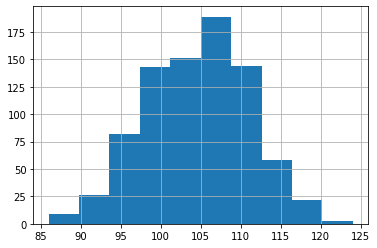

In [13]:
df['Full-flowering_date_(DOY)'].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

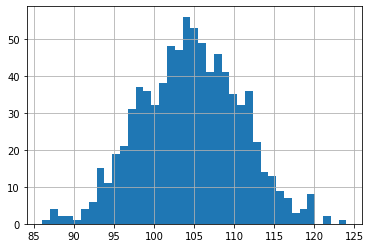

In [14]:
df['Full-flowering_date_(DOY)'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [15]:
df['Full-flowering_date_(DOY)'].describe()
# On average a cherry flower needs over 104 days to blossom
# In total we have 827 records

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering_date_(DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [16]:
df[df.AD < 1900]['Full-flowering_date_(DOY)'].median()

105.0

## 11. How about after 1900?

In [17]:
df[df.AD > 1900]['Full-flowering_date_(DOY)'].median()

99.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [18]:
df.Data_type_code.value_counts()
# We see in the documentation that the data from a poem equals to number 4
# we see that there are 39 values

2.0    454
1.0    166
0.0    124
4.0     39
3.0     30
8.0     11
9.0      3
Name: Data_type_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [18]:
df[df.Data_type_code == 4]

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code,Reference_Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:xlabel='AD'>

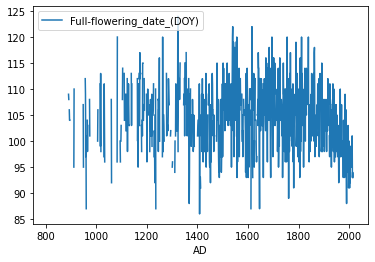

In [19]:
df.plot(x='AD', y='Full-flowering_date_(DOY)')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [20]:
df.rolling(10, on='AD', min_periods=5).mean().tail()

,AD,Data_type_code,Full-flowering_date,Full-flowering_date_(DOY),Source_code
1210,2011,0.0,405.7,95.9,5.3
1211,2012,0.0,406.6,96.9,5.7
1212,2013,0.0,406.1,96.4,6.1
1213,2014,0.0,406.4,96.6,6.5
1214,2015,0.0,405.8,96.0,6.9


In [22]:
df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code
1210,2011,95.9,405.7,5.3,0.0
1211,2012,96.9,406.6,5.7,0.0
1212,2013,96.4,406.1,6.1,0.0
1213,2014,96.6,406.4,6.5,0.0
1214,2015,96.0,405.8,6.9,0.0


<AxesSubplot:xlabel='AD'>

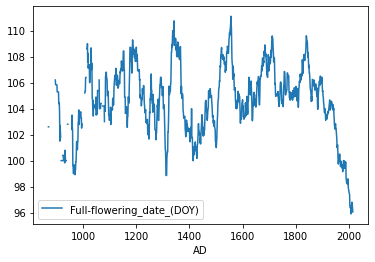

In [28]:
df.rolling(20, on='AD', min_periods=5).mean().plot(y='Full-flowering_date_(DOY)', x='AD')

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

In [31]:
df['Month_date'] = pd.to_datetime(df['Full-flowering_date'], errors='coerce', format="%m%d").dt.strftime("%B")

### 17. Using your new column, how many blossomings happened in each month?

In [26]:
df['Month_date'].value_counts()

April    814
March     10
May        3
Name: Month_date, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot:>

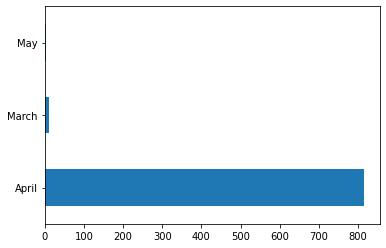

In [37]:
df['Month_date'].value_counts().plot(kind='barh')

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [38]:
df['Day_of_month'] = pd.to_datetime(df['Full-flowering_date'], errors='coerce', format="%m%d").dt.strftime("%d")

### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [40]:
df['Date'] = df['Month_date'] + ' ' + df['Day_of_month']

In [42]:
df.tail()

,AD,Full-flowering_date_(DOY),Full-flowering_date,Source_code,Data_type_code,Reference_Name,Month_date,Day_of_month,Date
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,09,April 09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,10,April 10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03,April 03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,04,April 04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03,April 03
